# Exploratory Data Analysis<a id='Exploratory_data_analysis'></a>

In [2]:
#Import necessary packages and load dataset
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

patient_data = pd.read_csv('../data/patient_data_cleaned.csv')

In [3]:
#Verify data loaded correctly
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.1+ KB


In [4]:
patient_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [5]:
#one hot encoding patient data to allow for assesment of correlation
one_hot_patient_data = patient_data.copy()
one_hot_patient_data = pd.get_dummies(one_hot_patient_data)
one_hot_patient_data.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120,339.0,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6,45,130,237.0,0,170,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7,54,110,208.0,0,142,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8,37,140,207.0,0,130,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
9,48,120,284.0,0,120,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


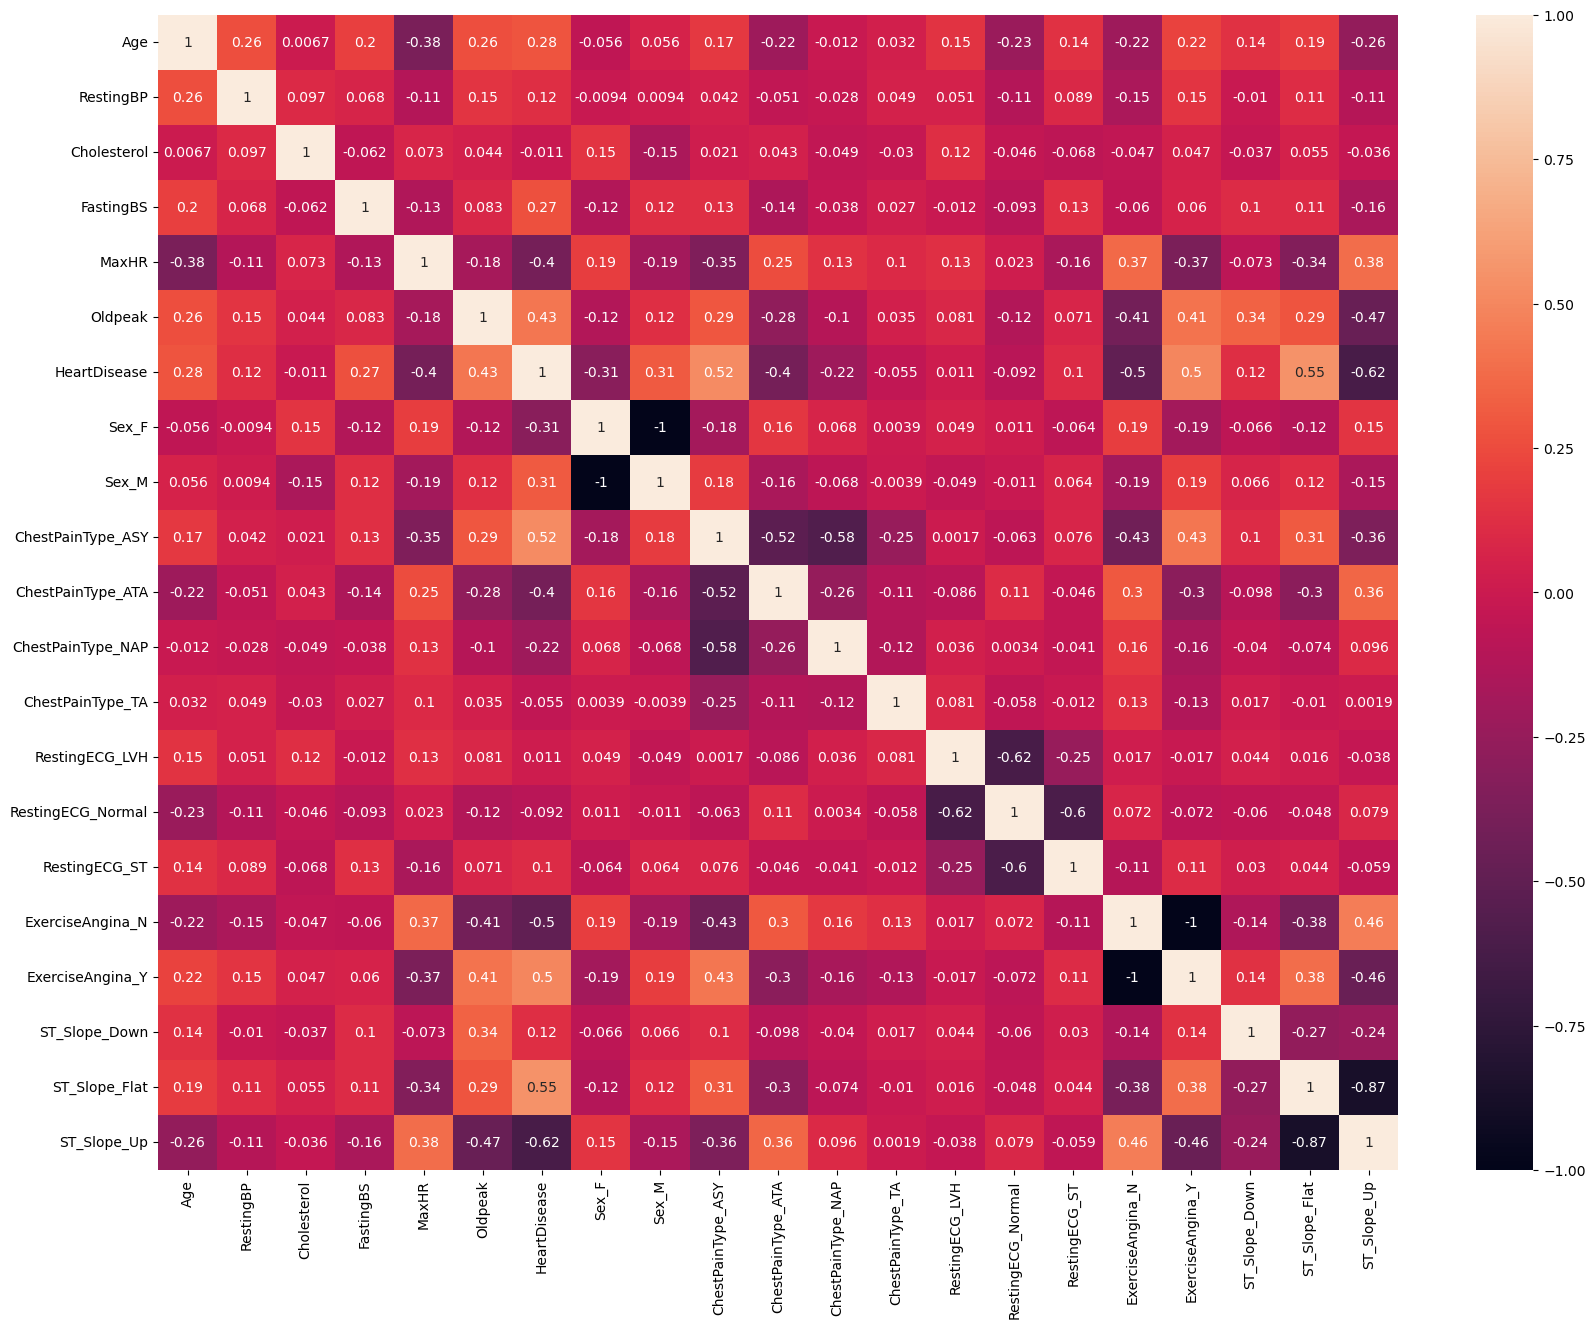

In [6]:
#Plot Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(one_hot_patient_data.corr(), annot=True)
plt.show()

Variables with a strong correlation to Heart Disease: ST_Slope, ExerciseAngina

Variables with a moderate correlation to Heart Disease: ChestPainType, Oldpeak, MaxHR, Sex

In [7]:
#Creation of principle component analysis for patient data to determine variance
patient_data_numeric = one_hot_patient_data.select_dtypes(exclude=['object'])
patient_data_columns = patient_data_numeric.columns
patient_data_scale = scale(patient_data_numeric)
patient_data_scale_df = pd.DataFrame(patient_data_scale, columns=patient_data_columns)
patient_data_scale_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432206,0.414627,0.940762,-0.551733,1.383339,-0.878675,-1.112019,-0.516309,0.516309,-1.085425,...,-0.531524,-0.22981,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573
1,-0.478057,1.526360,-0.998714,-0.551733,0.754736,0.083492,0.899266,1.936826,-1.936826,-1.085425,...,1.881384,-0.22981,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888
2,-1.750256,-0.141240,0.834002,-0.551733,-1.523953,-0.878675,-1.112019,-0.516309,0.516309,-1.085425,...,-0.531524,-0.22981,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573
3,-0.584074,0.303453,-0.393740,-0.551733,-1.131075,0.564576,0.899266,1.936826,-1.936826,0.921298,...,-0.531524,-0.22981,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888
4,0.052026,0.970493,-0.731814,-0.551733,-0.581047,-0.878675,-1.112019,-0.516309,0.516309,-1.085425,...,1.881384,-0.22981,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573


In [8]:
patient_pca = PCA().fit(patient_data_scale)

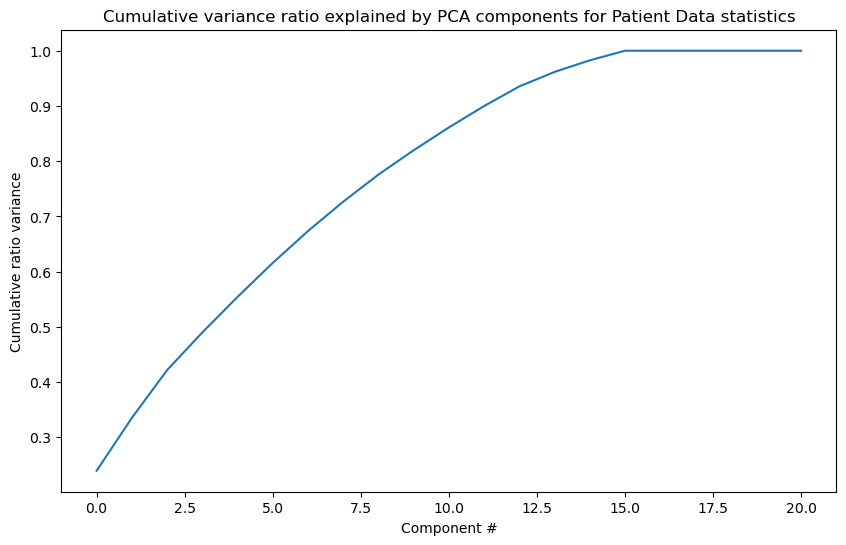

In [9]:
plt.subplots(figsize=(10, 6))
plt.plot(patient_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Patient Data statistics');
plt.show()

PCA shows a relatively linear relationship with three components comprising 50% of the cumulative variance and 10 components comprising roughly 85%. 

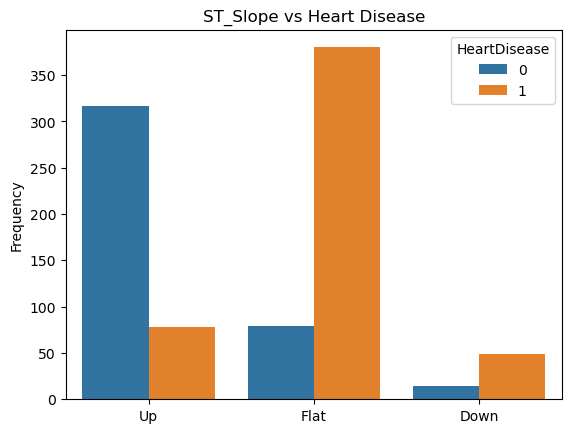

In [10]:
#Plotting ST_Slope, ExerciseAngina, ChestPainType, Sex against Heart Disease
sns.countplot(data=patient_data, x='ST_Slope', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('ST_Slope vs Heart Disease')
plt.show()

S/T slope which is the segment shift relative to exercise-induced increments of heart rate shows a strong correlation with heart disease, judging by the frequency plot this correlation is based on a flat or down trend with an upward trend showing the least likely to correspond. 

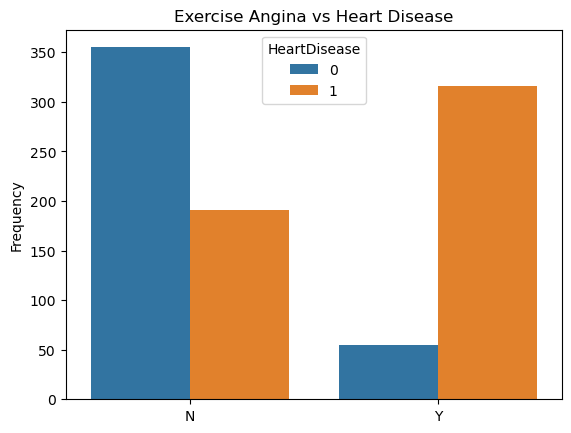

In [11]:
sns.countplot(data=patient_data, x='ExerciseAngina', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Exercise Angina vs Heart Disease')
plt.show()

Exercise Angina or the presence of pain with an increase in heart rate shows a strong correlation with heart disease, judging by the frequency plot, the presence of pain is a strong indicator of heart disease however, the absence of pain is not significant in the determination.

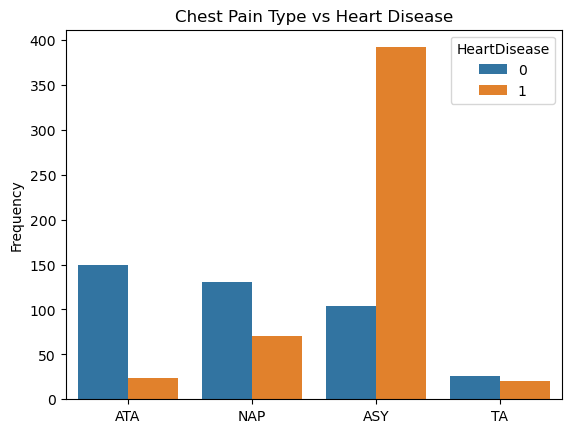

In [12]:
sns.countplot(data=patient_data, x='ChestPainType', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

Chest pain type has a moderate correlation with heart disease, based on the frequency plot type ASY is a strong indicator.  

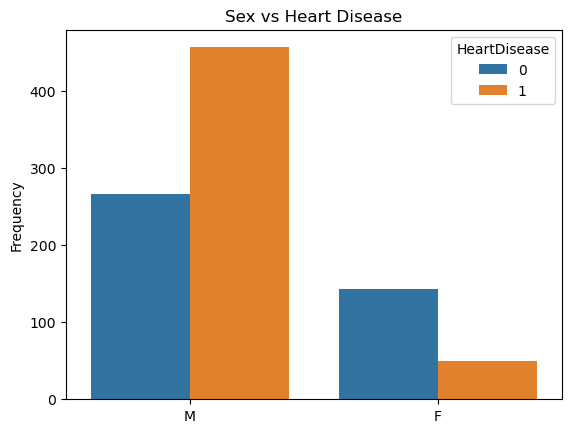

In [20]:
sns.countplot(data=patient_data, x='Sex', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Sex vs Heart Disease')
plt.show()

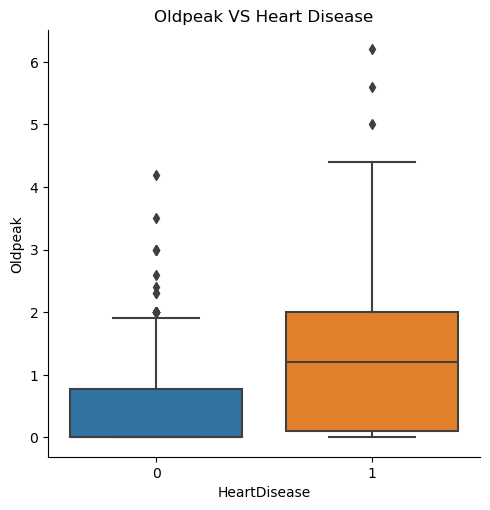

In [13]:
sns.catplot(data=patient_data, x='HeartDisease', y='Oldpeak', kind='box')
plt.title('Oldpeak VS Heart Disease')
plt.show()

In [15]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

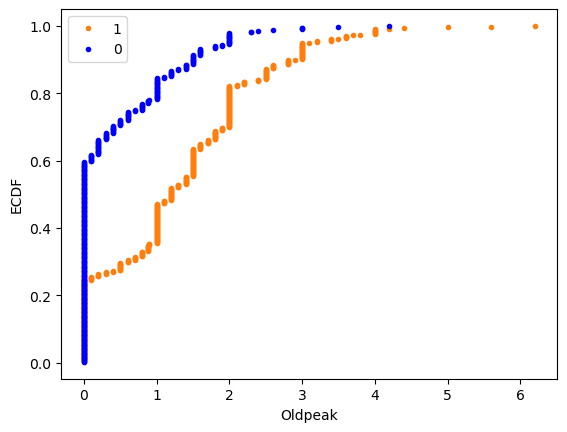

In [17]:
Oldpeak_HD = patient_data.loc[patient_data['HeartDisease'] == 1]
Oldpeak_NHD = patient_data.loc[patient_data['HeartDisease'] == 0]
x_Oldpeak, y_Oldpeak = ecdf(Oldpeak_HD['Oldpeak'])
x_Oldpeak_NHD, y_Oldpeak_NHD = ecdf(Oldpeak_NHD['Oldpeak'])
line1 = plt.plot(x_Oldpeak,y_Oldpeak, color='tab:orange', marker='.', linestyle='none')
line2 = plt.plot(x_Oldpeak_NHD,y_Oldpeak_NHD, color='b', marker='.', linestyle='none')
plt.legend(['1', '0'])
plt.xlabel('Oldpeak')
plt.ylabel('ECDF')
plt.show()

Oldpeak has a moderate correlation with heart disease, based on the box plot type and ecdf those with heart disease are more likely to have a nonzero Old peak. 

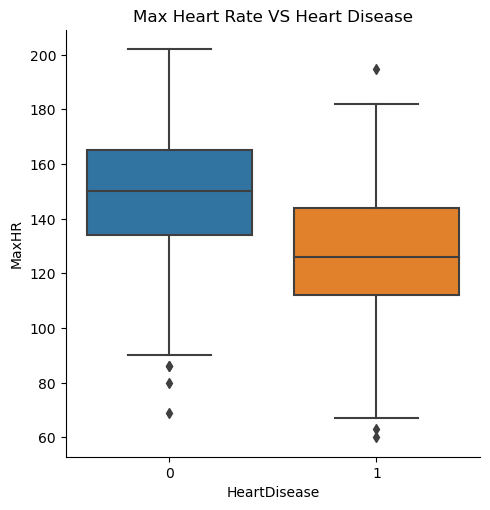

In [14]:
sns.catplot(data=patient_data, x='HeartDisease', y='MaxHR', kind='box')
plt.title('Max Heart Rate VS Heart Disease')
plt.show()

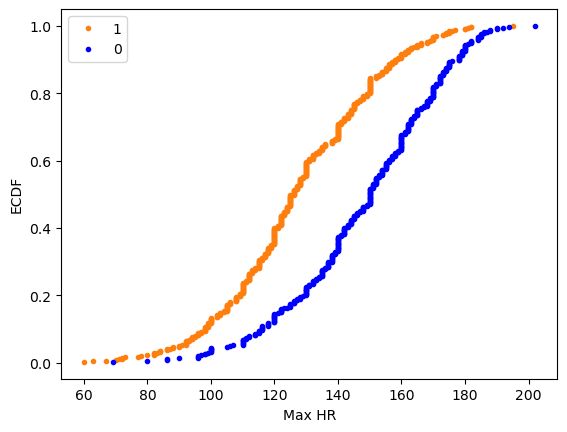

In [16]:
MaxHR_HD = patient_data.loc[patient_data['HeartDisease'] == 1]
MaxHR_NHD = patient_data.loc[patient_data['HeartDisease'] == 0]
x_MaxHR, y_MaxHR = ecdf(MaxHR_HD['MaxHR'])
x_MaxHR_NHD, y_MaxHR_NHD = ecdf(MaxHR_NHD['MaxHR'])
line1 = plt.plot(x_MaxHR,y_MaxHR, color='tab:orange', marker='.', linestyle='none')
line2 = plt.plot(x_MaxHR_NHD,y_MaxHR_NHD, color='b', marker='.', linestyle='none')
plt.legend(['1', '0'])
plt.xlabel('Max HR')
plt.ylabel('ECDF')
plt.show()

Max heart rate has a moderate correlation with heart disease, based on the box plot type and ecdf those with heart disease are more likely to have a lower max heart rate. 